In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")
df.head()
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


(891, 15)

In [5]:
df["fare_per_age"] = df["fare"] / df["age"]
df[["fare", "age", "fare_per_age"]].head()


,fare,age,fare_per_age
0,7.2500,22.0,0.329545
1,71.2833,38.0,1.875876
2,7.9250,26.0,0.304808
3,53.1000,35.0,1.517143
4,8.0500,35.0,0.230000


In [8]:
adults = df[df["age"] >= 18]
adults.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_per_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.329545
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.875876
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.304808
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.517143
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.230000


In [18]:
sorted_df = df.sort_values("fare", ascending=False)
sorted_df.head(10)
print(sorted_df[:10])

     survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
258         1       1  female  35.0      0      0  512.3292        C  First   
737         1       1    male  35.0      0      0  512.3292        C  First   
88          1       1  female  23.0      3      2  263.0000        S  First   
438         0       1    male  64.0      1      4  263.0000        S  First   
341         1       1  female  24.0      3      2  263.0000        S  First   
27          0       1    male  19.0      3      2  263.0000        S  First   
742         1       1  female  21.0      2      2  262.3750        C  First   
311         1       1  female  18.0      2      2  262.3750        C  First   
299         1       1  female  50.0      0      1  247.5208        C  First   

       who  adult_male deck  embark_town alive  alone  fare_per_age  
258  woman       False  NaN    Cherbourg   yes   True     14.637977  
737    man        True    B    Cherbourg   yes   True     14.637977  

In [27]:
df.isna().sum()

survived          0
pclass            0
sex               0
age               0
sibsp             0
parch             0
fare              0
embarked          2
class             0
who               0
adult_male        0
deck            582
embark_town       2
alive             0
alone             0
fare_per_age    106
dtype: int64

In [25]:
#df["age"].fillna(df["age"].median(), inplace=True)
df.fillna({"age": df["age"].median()}, inplace=True)
df.drop_duplicates(inplace=True)
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0           0       3    male  22.0      1      0   7.2500        S  Third   
1           1       1  female  38.0      1      0  71.2833        C  First   
2           1       3  female  26.0      0      0   7.9250        S  Third   
3           1       1  female  35.0      1      0  53.1000        S  First   
4           0       3    male  35.0      0      0   8.0500        S  Third   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
885         0       3  female  39.0      0      5  29.1250        Q  Third   
887         1       1  female  19.0      0      0  30.0000        S  First   
888         0       3  female  28.0      1      2  23.4500        S  Third   
889         1       1    male  26.0      0      0  30.0000        C  First   
890         0       3    male  32.0      0      0   7.7500        Q  Third   

       who  adult_male deck  embark_town alive  alone  fare_per

In [26]:
df.isna().sum()

survived          0
pclass            0
sex               0
age               0
sibsp             0
parch             0
fare              0
embarked          2
class             0
who               0
adult_male        0
deck            582
embark_town       2
alive             0
alone             0
fare_per_age    106
dtype: int64

In [38]:
df.fillna({"embarked": df["embarked"].mode()[0], "deck": df["deck"].mode()[0], "embark_town": df["embark_town"].mode()[0], "fare_per_age": df["fare_per_age"].mean()}, inplace=True)
#df.fillna({"deck": df["deck"].mode()}, inplace=True)
#df.fillna({"embark_town": df["embark_town"].mode()}, inplace=True)

In [39]:
df.isna().sum()

survived        0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
class           0
who             0
adult_male      0
deck            0
embark_town     0
alive           0
alone           0
fare_per_age    0
dtype: int64

class
First     0.630841
Second    0.509091
Third     0.256790
Name: survived, dtype: float64


<Axes: xlabel='class'>

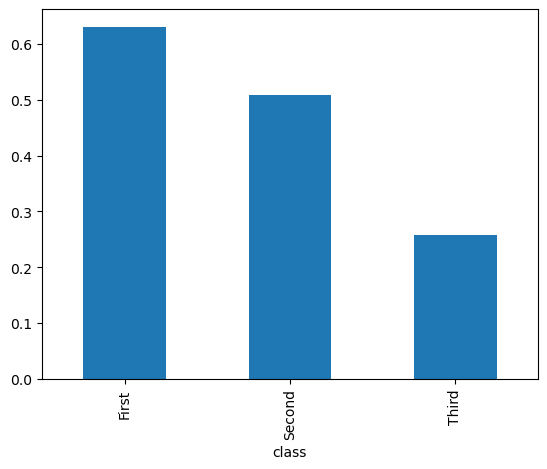

In [40]:
survival_by_class = df.groupby("class")["survived"].mean()
print(survival_by_class)
survival_by_class.plot(kind="bar")

In [53]:
def titanic_report(data):
    return {
        "survival_rate": data["survived"].mean(),
        "avg_fare_survivors": data[data["survived"] == 1]["fare"].mean(),
        "avg_fare_non_survivors": data[data["survived"] == 0]["fare"].mean(),
        "survival_by_gender": data.groupby("sex")["survived"].mean().to_dict(),
        "survival_by_age_group": data.groupby(pd.cut(data["age"], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], right=True), observed=True)["age"].mean()
    }
report = titanic_report(df)
report

{'survival_rate': np.float64(0.4119897959183674),
 'avg_fare_survivors': np.float64(50.07918049535604),
 'avg_fare_non_survivors': np.float64(23.944530585683296),
 'survival_by_gender': {'female': 0.7406143344709898,
  'male': 0.2158859470468432},
 'survival_by_age_group': age
 (0, 10]      4.324127
 (10, 20]    17.261468
 (20, 30]    26.286392
 (30, 40]    35.087838
 (40, 50]    45.333333
 (50, 60]    54.892857
 (60, 70]    63.882353
 (70, 80]    73.300000
 Name: age, dtype: float64}

In [54]:
df.to_csv("titanic_cleaned.csv", index=False)